# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
df_Positive = pd.read_csv('5_a.csv')
print("Actual : ", df_Positive.y.value_counts(), '\n')

df_Positive['pred'] = df_Positive.proba.apply(lambda x: 0 if x<0.5 else 1).astype('int')
print("Predicted : ", df_Positive['pred'].value_counts(), '\n')

Actual :  1.0    10000
0.0      100
Name: y, dtype: int64 

Predicted :  1    10100
Name: pred, dtype: int64 



In [3]:
def compute_tp_tn_fn_fp(y_act, y_pred):
    
    '''
    True positive - actual = 1, predicted = 1
    False positive - actual = 1, predicted = 0
    False negative - actual = 0, predicted = 1
    True negative - actual = 0, predicted = 0
    '''
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    
    return tp, tn, fp, fn

def compute_accuracy(tp, tn, fn, fp):
    '''
    Accuracy = TP + TN / FP + FN + TP + TN
    '''
    return ((tp + tn) * 100)/ float( tp + tn + fn + fp)

def compute_precision(tp, fp):
    '''
    Precision = TP  / FP + TP 
    '''
    if tp != 0:
        return (tp  * 100)/ float( tp + fp)
    else : 
        return 0
        

def compute_recall(tp, fn):
    '''
    Recall = TP /FN + TP 
    
    '''
    if tp != 0:
        return (tp  * 100)/ float( tp + fn)
    else : 
        return 0
    

def false_pos_rate(fp, tn):
    '''
    FP = FP / FP + 1
    
    '''
    if fp != 0:
        return (fp  * 100)/ float( fp + tn)
    else : 
        return 0
    

def compute_f1_score(y_true, y_pred):
    
    ''' calculates the F1 score '''
    
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100

    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score

def AUC(tpr, fpr):
    
    ''' 
    Calculates AUC for various Thresholds
    
    '''

    return np.trapz(tpr, fpr)


tp, tn, fp, fn = compute_tp_tn_fn_fp(df_Positive.y, df_Positive.pred)

print('tp, tn, fp, fn : ', tp, tn, fp, fn)

print("Accuracy is : ", compute_accuracy(tp, tn, fp, fn))

print('Precision is :', compute_precision(tp, fp))

print('Recall is :', compute_recall(tp, fn))

print('F1 Score is : ', compute_f1_score(df_Positive.y, df_Positive.pred))


tp, tn, fp, fn :  10000 0 100 0
Accuracy is :  99.00990099009901
Precision is : 99.00990099009901
Recall is : 100.0
F1 Score is :  0.9950248756218906


In [4]:
import matplotlib.pyplot as plt
from sklearn import metrics

TPR = []
FPR = []
threshold = []

for i in np.arange(0.1, 1.1, 0.05):

    df_Positive['thresh_' + str(i)] = df_Positive.proba.apply(lambda x: 0 if x<i else 1).astype('int')
    
    tp, tn, fp, fn = compute_tp_tn_fn_fp(df_Positive.y, df_Positive['thresh_' + str(i)])
    
    tpr = int(compute_recall(tp, fn))
    fpr = int(false_pos_rate(fp, tn))
    
    TPR.append(tpr)
    FPR.append(fpr)
    threshold.append(i)
    
auc = AUC(np.array(sorted(TPR), ndmin=1), np.array(sorted(FPR), ndmin=1))

print("AUC IS : " , auc, '\n')

AUC IS :  4863.5 



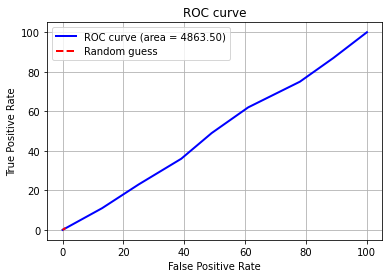

In [5]:
auc = AUC(np.array(sorted(TPR), ndmin=1), np.array(sorted(FPR), ndmin=1))

plt.plot(FPR, TPR, label='ROC curve (area = %.2f)'%auc, lw=2, color='b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [6]:
df_Negative = pd.read_csv('5_b.csv')
print("Actual : ", df_Negative.y.value_counts(), '\n')

df_Negative['pred'] = df_Negative.proba.apply(lambda x: 0 if x<0.5 else 1)
print("Predicted : ", df_Negative['pred'].value_counts(), '\n')

tp, tn, fp, fn = compute_tp_tn_fn_fp(df_Negative.y, df_Negative.pred)

print('tp, tn, fp, fn : ', tp, tn, fp, fn)

print("Accuracy is : ", compute_accuracy(tp, tn, fp, fn))

print('Precision is :', compute_precision(tp, fp))

print('Recall is :', compute_recall(tp, fn))

print('F1 Score is : ', compute_f1_score(df_Negative.y, df_Negative.pred))

Actual :  0.0    10000
1.0      100
Name: y, dtype: int64 

Predicted :  0    9806
1     294
Name: pred, dtype: int64 

tp, tn, fp, fn :  55 9761 239 45
Accuracy is :  97.18811881188118
Precision is : 18.707482993197278
Recall is : 55.0
F1 Score is :  0.27918781725888325


In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics

TPR = []
FPR = []
threshold = []

for i in np.arange(0.1, 1.1, 0.05):

    df_Negative['thresh_' + str(i)] = df_Negative.proba.apply(lambda x: 0 if x<i else 1).astype('int')
    
    tp, tn, fp, fn = compute_tp_tn_fn_fp(df_Negative.y, df_Negative['thresh_' + str(i)])
    
    tpr = int(compute_recall(tp, fn))
    fpr = int(false_pos_rate(fp, tn))
    
    TPR.append(tpr)
    FPR.append(fpr)
    threshold.append(i)
    
auc = AUC(np.array(sorted(TPR), ndmin=1), np.array(sorted(FPR), ndmin=1))

print("AUC IS : " , auc, '\n')

AUC IS :  9360.0 



<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [8]:
df = pd.read_csv('5_c.csv')

df.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


Actual label is :  0    1805
1    1047
Name: y, dtype: int64
optimal threshold is :  0.25000000000000006


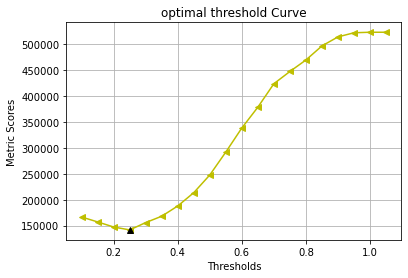

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics

print('Actual label is : ', df.y.value_counts())

scores=[]
threshold = []

for i in np.arange(0.1, 1.1, 0.05):

    df['thresh_' + str(i)] = df.prob.apply(lambda x: 0 if x<i else 1).astype('int')
    tp, tn, fp, fn = compute_tp_tn_fn_fp(df.y, df['thresh_' + str(i)])
    A = (500 * fn) + (100 * fp)
    
    threshold.append(i)
    scores.append(A)

min_score = min(scores)
optimal_threshold = threshold[scores.index(min_score)]
print("optimal threshold is : ", optimal_threshold)

plt.plot(threshold, scores, marker='<', color='y');

plt.plot(optimal_threshold, min_score, marker='^', color='k');    
plt.xlabel("Thresholds")
plt.ylabel("Metric Scores")
plt.title("optimal threshold Curve")
plt.grid()

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [10]:
def MSE(Ytrue, Ypred):
    return np.square(np.subtract(Ypred,Ytrue)).mean()

def MAPE(ytrue, ypred):
    ytrue, ypred = np.array(ytrue), np.array(ypred)
    error = np.subtract(ytrue, ypred)
    return sum(error) / sum(ytrue) * 100

def R2(ytrue, ypred):
    act_mean = np.mean(ytrue)
    ss_tot = np.sum(np.subtract(ypred, ytrue)**2)
    ss_res = np.sum(np.subtract(ytrue, act_mean)**2)
    return 1-(ss_tot / ss_res)

df = pd.read_csv('5_d.csv')

print("MSE : ", MSE(df.pred, df.y), '\n')

print("R2 : ", R2(df.y, df.pred), '\n')

print("MAPE : ", MAPE(df.y, df.pred), '\n')


MSE :  177.16569974554707 

R2 :  0.9563582786990937 

MAPE :  0.11774195398124539 

